In [13]:
import pandas as pd
import numpy as np
import random

# 3(a) [10 points] Write a function ridge regression(tX; tY; l) that takes the training features, training responses and regularizing parameter $\lambda$, and outputs the exact solution $\theta$ for ridge regression. Report the resulting value of $\theta$ for $\lambda$ = 0.15.

In [7]:
df = pd.DataFrame()
with open('data/3/hw1_ridge_x.dat', 'r') as f1:
    # next(f) # skip first row
    df_x = pd.DataFrame((l.rstrip().split(',') for l in f1), columns=['x1','x2','x3','x4'])

with open('data/3/hw1_ridge_y.dat', 'r') as f2:
    # next(f) # skip first row
    #df_y = pd.DataFrame()
    #label_list = [l.rstrip().split()[0] for l in f2]
    #print(label_list)
    df_y = pd.DataFrame((l.rstrip().split() for l in f2), columns=['y'])
    #df_y['y'] = label_list
    print(df_y)
df_x=df_x.astype(float)
df_y=df_y.astype(float)

vX = df_x.head(10).values
tX = df_x.tail(40).values
vY = np.array(df_y.head(10))
tY = np.array(df_y.tail(40))
print('The validation x is: \n{}'.format(vX))
print('The test x is: \n{}'.format(tX))
print('The validation y is: \n{}'.format(vY))
print('The test y is: \n{}'.format(tY))

                     y
0    -1.13933054418729
1    -1.38956280272455
2    -1.46427864519255
3   -0.771402282836843
4    -2.45451924323433
5    -2.53173136529269
6   -0.585147032511934
7    -4.53260862043966
8   -0.593824236717293
9    -1.38688905971912
10   -2.49527766850141
11   -1.73538943211652
12    0.91300105348625
13   -4.14696407077148
14   -3.47921987976619
15   -2.00766789387212
16   -3.72876356921769
17   -1.11373904691801
18  -0.716923558501225
19   -1.33254433207279
20  -0.984736485140916
21   -4.77208525334549
22  -0.989487677263845
23   0.444727886065754
24  -0.129070694759691
25   -2.77946763634608
26    1.20221693265651
27   -3.91963951568596
28   -4.37192529305329
29  -0.498441678852203
30   -4.59804438953968
31  -0.382168049862368
32   -1.56516376434081
33  -0.720897800318107
34  -0.724296802078357
35    -1.8829537957885
36  -0.237402764116535
37  -0.714888106720234
38   -3.64062349641719
39   -3.01168856716308
40  -0.477597120292055
41   -3.12712799176494
42   -4.751

In [15]:
def ridgeregression(tX, tY, l):
    first_dimension = tX.shape[0]
    second_dimension = tX.shape[1]
    identity_matrix = np.identity(second_dimension)
    n_lambda_i = first_dimension * l * identity_matrix
    xt_x = np.transpose(tX).dot(tX)
    xt_y = np.transpose(tX).dot(tY)
    add_matrix = n_lambda_i + xt_x
    inverse_matrix = np.linalg.inv(add_matrix)
    weight = inverse_matrix.dot(xt_y)
    return weight
ridgeregression(tX, tY,0.15)

array([[-0.57939825],
       [ 1.15033028],
       [ 0.04934122],
       [-1.59867896]])

# 3(b) [10 points] Use the following code to plot graphs of the validation loss and training loss as $\lambda$ varies on logarithmic scale from $\lambda$ = 10<sup>-5</sup> to $\lambda$ = 10<sup>0</sup>. Write down the value of $\lambda$ that minimizes the validation loss.

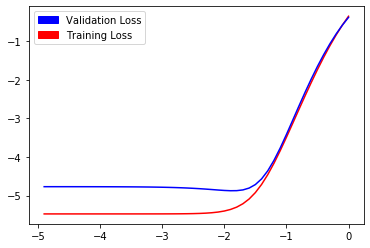

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
tn = tX.shape[0]
vn = vX.shape[0]
tloss = []
vloss = []
index = -np.arange(0, 5, 0.1)
lowest_index = 0.0
lowest_validation_loss = 100.0
for i in index:
    if i == 0.0:
        lowest_index = i
        lowest_validation_loss = np.sum((np.dot(vX, w) - vY) ** 2 )/vn/2
    w = ridgeregression(tX, tY, 10 ** i )
    tloss = tloss + [np.sum((np.dot(tX, w) - tY) ** 2 )/tn/2]
    vloss = vloss + [np.sum((np.dot(vX, w) - vY) ** 2 )/vn/2]
    current_validation_loss = np.sum((np.dot(vX, w) - vY) ** 2 )/vn/2
    if current_validation_loss < lowest_validation_loss:
        lowest_validation_loss = current_validation_loss
        lowest_index = i
plt.plot(index,np.log(tloss),'r')
plt.plot(index,np.log(vloss), 'b')
blue_patch = mpatches.Patch(color='blue', label='Validation Loss')
red_patch = mpatches.Patch(color='red', label='Training Loss')
plt.legend(handles=[blue_patch, red_patch])

In [27]:
print('''The power to the lambda that minimizes the validation loss is {}, 
with a validation loss of {}'''.format(lowest_index.round(3), lowest_validation_loss))

The power to the lambda that minimizes the validation loss is -1.9, 
with a validation loss of 0.007627810885830868


## The value of $\lambda$ that minmizes the validation loss is $\lambda$= 10<sup>-1.9</sup>